In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


pd.Series(np.random.normal(size=10000)*50+1000)
fig,ax=plt.subplots(figsize=(10,5))
ax2=ax.twinx()
ax.hist(series, bins=100)
ax2.hist(series, cumulative=True, histtype='step', bins=100, color='r')
plt.show()


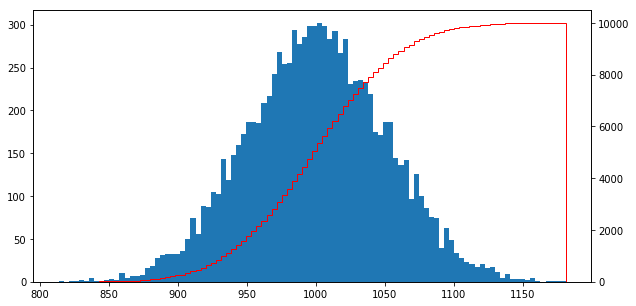

In [7]:
series=pd.Series(np.random.normal(size=10000)*50+1000)
fig,ax=plt.subplots(figsize=(10,5))
ax2=ax.twinx()
ax.hist(series, bins=100)
ax2.hist(series, cumulative=True, histtype='step', bins=100, color='r')
plt.show()

In [170]:
#Seasonality

from google.colab import files
uploaded = files.upload()
import io
cs = pd.read_csv(io.BytesIO(uploaded['cs-training.csv']))



Saving cs-training.csv to cs-training (4).csv


In [167]:
print(cs.head(5))
cs.head()

   ID  SeriousDlqin2yrs  ...  NumberRealEstateLoansOrLines  NumberOfDependents
0   1                 1  ...                             6                 2.0
1   2                 0  ...                             0                 1.0
2   3                 0  ...                             0                 0.0
3   4                 0  ...                             0                 0.0
4   5                 0  ...                             1                 0.0

[5 rows x 9 columns]


,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
0,1,1,0.766127,45,0.802982,9120.0,13,6,2.0
1,2,0,0.957151,40,0.121876,2600.0,4,0,1.0
2,3,0,0.658180,38,0.085113,3042.0,2,0,0.0
3,4,0,0.233810,30,0.036050,3300.0,5,0,0.0
4,5,0,0.907239,49,0.024926,63588.0,7,1,0.0


In [0]:
cs = cs.drop(cs.columns[[4,8,10]],axis=1)

In [145]:
cs.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
0,1,1,0.766127,45,0.802982,9120.0,13,6,2.0
1,2,0,0.957151,40,0.121876,2600.0,4,0,1.0
2,3,0,0.658180,38,0.085113,3042.0,2,0,0.0
3,4,0,0.233810,30,0.036050,3300.0,5,0,0.0
4,5,0,0.907239,49,0.024926,63588.0,7,1,0.0


In [146]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 9 columns):
ID                                      150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(5)
memory usage: 10.3 MB


###Dependent Variable - Serious Dlqin-2yrs

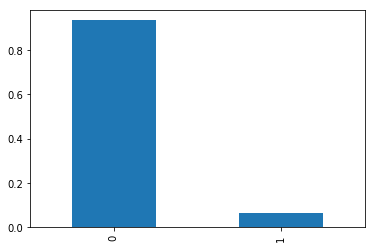

In [147]:
cs['SeriousDlqin2yrs'].value_counts(normalize=True).plot.bar()

###RevolvingUtilizationOfUnsecuredLines

In [0]:
# cs_util = cs[cs['RevolvingUtilizationOfUnsecuredLines']<=1]

# sns.boxplot('RevolvingUtilizationOfUnsecuredLines',data=cs_util)
# cs['RevolvingUtilizationOfUnsecuredLines'] = cs['RevolvingUtilizationOfUnsecuredLines'].map(lambda x: np.NaN if x>1 else x)
# cs['RevolvingUtilizationOfUnsecuredLines'].isna().sum()
# cs['RevolvingUtilizationOfUnsecuredLines'] = cs['RevolvingUtilizationOfUnsecuredLines'].fillna(cs['RevolvingUtilizationOfUnsecuredLines'].mean())
# cs['RevolvingUtilizationOfUnsecuredLines'].isna().sum()
# sns.distplot(cs['RevolvingUtilizationOfUnsecuredLines'])
#Did ffill

##Monthly Income

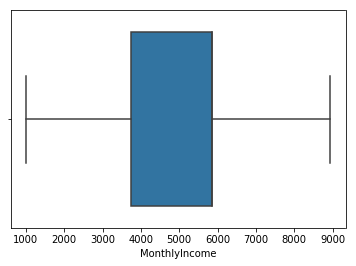

In [129]:
sns.boxplot(cs['MonthlyIncome'].dropna())


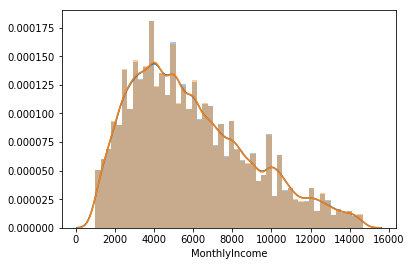

In [135]:
#Finaancial institutiion espect motnhlhy income of $1000 , hence we converted the values below 1000 to missinng
# cs['MonthlyIncome'] = cs['MonthlyIncome'].apply(lambda x:np.NaN if x<1000 else x)
# cs['MonthlyIncome'].describe()
# q1 = cs['MonthlyIncome'].quantile(0.25)
# q3 = cs['MonthlyIncome'].quantile(0.75)
# IQR=q3-q1
# cs['MonthlyIncome'].isna().sum()
# cs = cs[~((cs['MonthlyIncome']>(q3+1.5*IQR)))]
# #
# cs['MonthlyIncome'].describe()
# sns.distplot(cs['MonthlyIncome'].dropna())
# cs['MonthlyIncome'] = cs['MonthlyIncome'].fillna(method ='ffill')

# sns.distplot(cs['MonthlyIncome'])
# #print(q1,q3)

##NumberofopenCreditLinesAndLoans

0


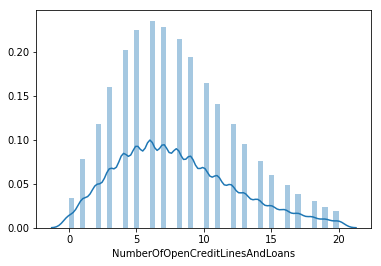

In [139]:
# cs['NumberOfOpenCreditLinesAndLoans'].describe()
# q1 = cs['NumberOfOpenCreditLinesAndLoans'].quantile(0.25)
# q3 = cs['NumberOfOpenCreditLinesAndLoans'].quantile(0.75)
# IQR=q3-q1
# print(cs['NumberOfOpenCreditLinesAndLoans'].isna().sum())
# cs = cs[~((cs['NumberOfOpenCreditLinesAndLoans']>(q3+1.5*IQR)))]
# sns.distplot(cs['NumberOfOpenCreditLinesAndLoans'])

##Exploratory Data Analysis
### Bivariate : SeriousDiqin2yrs and MonthlyIncome

In [0]:
#cs[['SeriousDlqin2yrs','MonthlyIncome']].boxplot()
#fig,axs= plt.subplots(1,2,figsize=(12,5))



/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


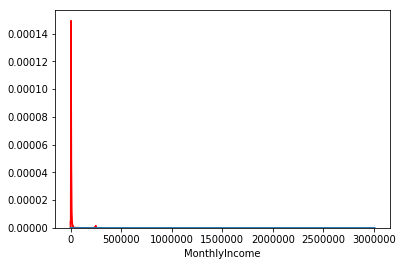

In [171]:
sns.distplot(cs['MonthlyIncome'][cs['SeriousDlqin2yrs']==1],hist=False,color='r')
sns.distplot(cs['MonthlyIncome'][cs['SeriousDlqin2yrs']==0],hist=False)

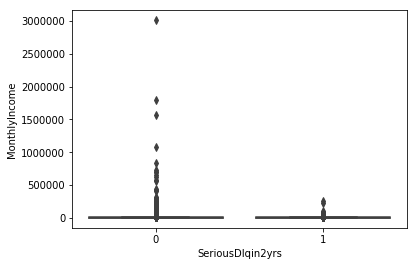

In [172]:
sns.boxplot(x='SeriousDlqin2yrs',y='MonthlyIncome',data=cs)

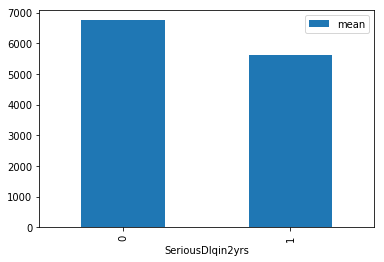

In [176]:
cs.groupby('SeriousDlqin2yrs')['MonthlyIncome'].agg(['mean']).plot.bar()

In [0]:

def proce_income(pt):
  q1 = cs['MonthlyIncome'].quantile(0.25)
  q2 = cs['MonthlyIncome'].quantile(0.5)
  q3 = cs['MonthlyIncome'].quantile(0.75)
  #print(q1,q2,q3)
  d= {1:'low' , 2:'Mid',3:'High',4:'VHigh'}
  if pt<q1:
    return d[1]
  elif q1<=pt<q2:
    return d[2]
  elif q2<=pt<q3:
    return d[3]
  else:
    return d[4]
  

In [0]:
#cs['MonthlyIncome_Category'] = cs['MonthlyIncome'].apply(proce_income)

In [0]:
pd.crosstab(data['MonthlyIncome_category'],data['SeriousDlqin2yrs'],normalize=0).plot.bar(stacked=False)
plt.figure(figsize=(12,5))

##SeriousDlqin2yrs and RevolvingUtilizationOfUnsecuredLines

> Indented block



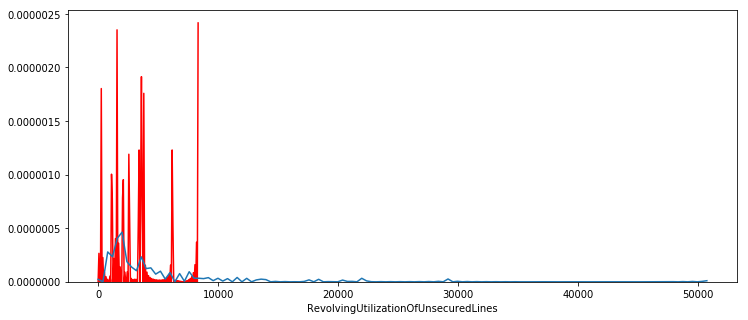

In [188]:
plt.figure(figsize=(12,5))
sns.distplot(cs['RevolvingUtilizationOfUnsecuredLines'][cs['SeriousDlqin2yrs']==1],hist=False,color='r')
sns.distplot(cs['RevolvingUtilizationOfUnsecuredLines'][cs['SeriousDlqin2yrs']==0],hist=False)

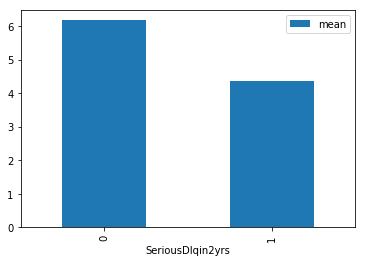

In [190]:
cs.groupby('SeriousDlqin2yrs')['RevolvingUtilizationOfUnsecuredLines'].agg(['mean']).plot.bar()

In [0]:
#import datetime as dt
# Time series data source: 

data['Month'] =pd.to_datetime(data['Month'])

#data['Year'] = df1.dt.year
# Draw Plot
# dat = df.groupby('Year')
# dat.head
data.head()
data = data.set_index('Month')



##MonthlyIncome  and Revolving

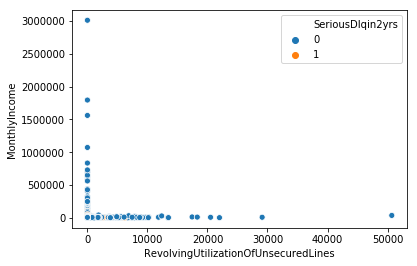

In [192]:
sns.scatterplot(x='RevolvingUtilizationOfUnsecuredLines',y='MonthlyIncome',hue='SeriousDlqin2yrs',data=cs)

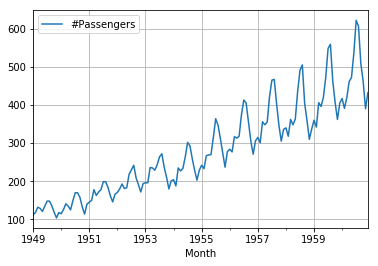

In [43]:
data.plot(grid=True)

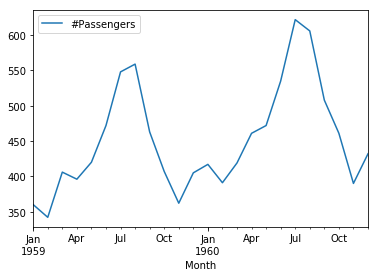

In [46]:
from datetime import datetime
start_date = datetime(1959,1,1)
end_date = datetime(1961,1,1)
data[(start_date<=data.index)&(data.index<=end_date)].plot()

###Time Series Analysis


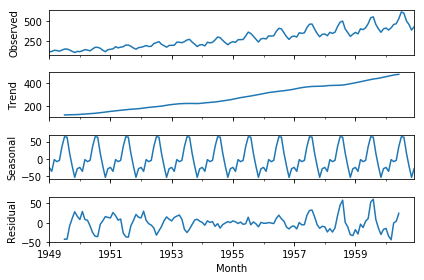

In [50]:
import statsmodels.api as sm
#import matplotlib

decomposition=sm.tsa.seasonal_decompose(data,model='additive')

fig= decomposition.plot()
plt.show()

In [51]:
pip install wordcloud

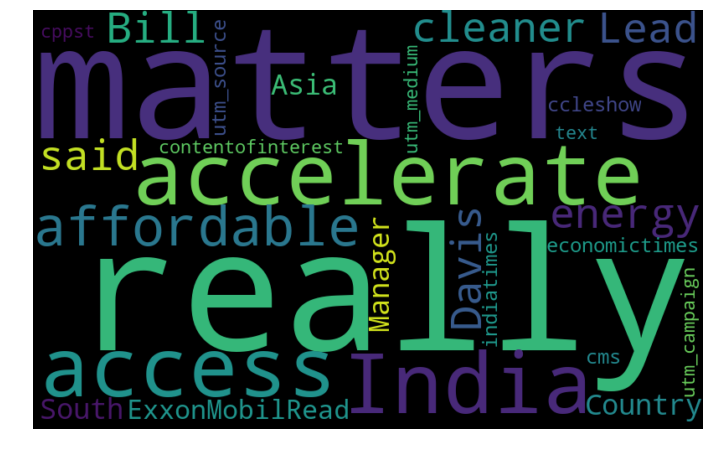

In [200]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(12,8))
text = 'What really matters is how we accelerate India’s access to affordable, cleaner energy,” said Bill Davis, Lead Country Manager, South Asia, ExxonMobilRead more at://economictimes.indiatimes.ccleshow/71589531.cms?utm_source=contentofinterest&utm_medium=text&utm_campaign=cppst'
wordcloud = WordCloud(width= 800,height=500,margin=0).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.margins(x=5,y=5)
plt.show()